Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [97]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [98]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [99]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [102]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

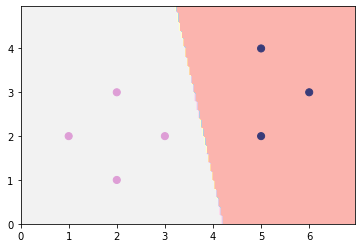

In [103]:
classifier = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, classifier.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

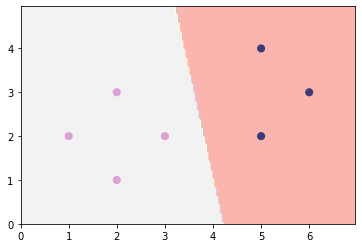

In [105]:
model = LinearRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [106]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

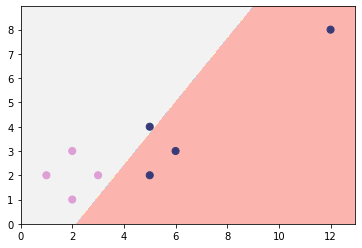

In [107]:
model = LinearRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : model.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [110]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

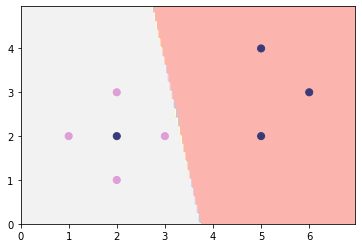

In [111]:
model = LinearRegression().fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, lambda x : model.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

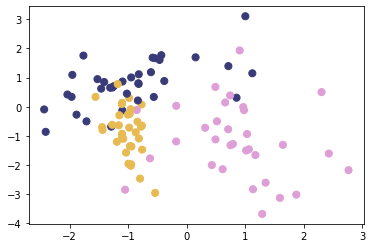

In [112]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'ridge classifier')

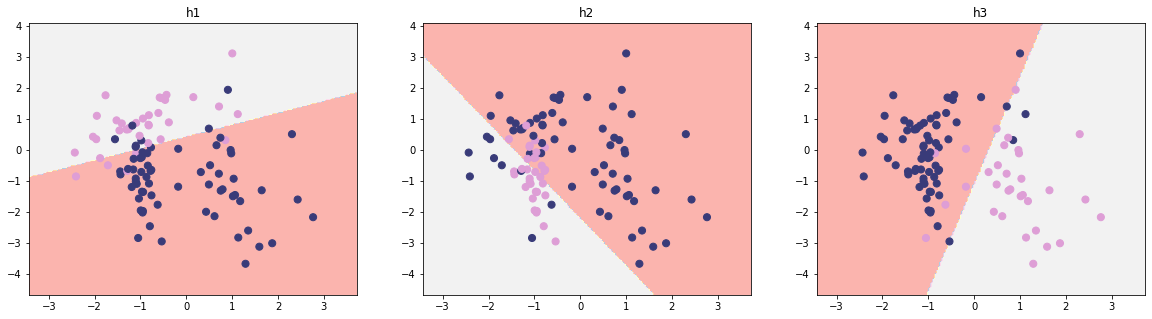

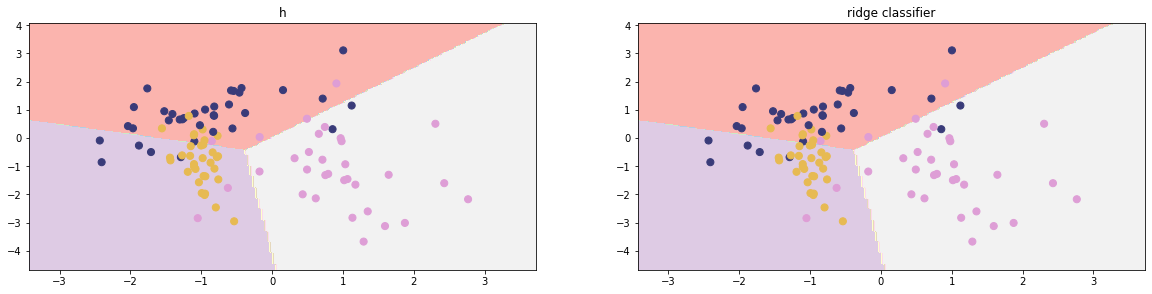

In [113]:
classes = list(set(y))
plt.figure(figsize= (20, 5))

y1 = numpy.zeros(100)
indices = [idx for idx, element in enumerate(y) if element == classes[0]]
y1[indices] = 1
h1 = LinearRegression().fit(X, y1)
plt.subplot(1,3,1)
plt.title("h1")
plot_2d_clf_problem(X, y1, lambda x : h1.predict(x) >=0.5)

y2 = numpy.zeros(100)
indices = [idx for idx, element in enumerate(y) if element == classes[1]]
y2[indices] = 1
h2 = LinearRegression().fit(X, y2)
plt.subplot(1,3,2)
plt.title("h2")
plot_2d_clf_problem(X, y2, lambda x : h2.predict(x) >=0.5)

y3 = numpy.zeros(100)
indices = [idx for idx, element in enumerate(y) if element == classes[2]]
y3[indices] = 1
h3 = LinearRegression().fit(X, y3)
plt.subplot(1,3,3)
plt.title("h3")
plot_2d_clf_problem(X, y3, lambda x : h3.predict(x) >=0.5)

pr = lambda x: argmax([h1.predict(x.reshape(1, -1)), h2.predict(x.reshape(1, -1)), h3.predict(x.reshape(1, -1))])

plt.figure(figsize= (20, 10))
plt.subplot(2,2,1)
plot_2d_clf_problem(X, y, lambda x : pr(x))
plt.title("h")

plt.subplot(2,2,2)
classifier = RidgeClassifier(alpha=0).fit(X,y)
plot_2d_clf_problem(X, y, classifier.predict)
plt.title("ridge classifier")

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

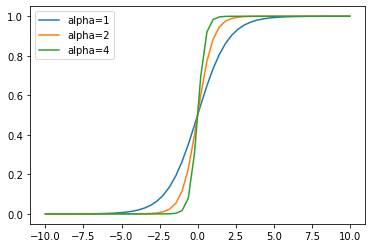

In [114]:
sigm = lambda x, alpha : 1/(1 + np.exp(-alpha*x))

x = linspace(-10,10)

for a in [1, 2, 4]:
    plt.plot(x, sigm(x, a), label="alpha={}".format(a))
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [116]:
from numpy import linalg

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    w_trace = []
    error_last = 0
    w0 = 0
    w = np.zeros(len(X[0]))
    w_tilda = np.zeros(len(X[0]))
    
    for k in range (max_iter):
        delta_w = np.zeros(len(w))
        delta_w0 = 0
        for i in range(len(y)):
            h = lr_h(X[i], np.array(w_tilda))
            delta_w0 += (h - y[i])
            delta_w += (h - y[i]) * X[i]
        w = w * (1 - eta * alpha) -  eta * delta_w
        w0 -= eta * delta_w0
        w_tilda[0] = w0;
        w_tilda[1:] = w[1:]
        error = cross_entropy_error(X, y, w_tilda)
        w_trace.append(np.array(w_tilda))
        if abs(error - error_last) <= epsilon:
            break
        error_last = error
    if trace :
        return np.array(w_tilda), w_trace
    else:
        return np.array(w_tilda)
    
lr_h = lambda xi, w : sigm(w.dot(xi), alpha = 1);

lr_h0 = lambda xi, w : sigm(w[1:].dot(xi) + w[0], alpha = 1)

def cross_entropy_error(X, y, w):
    if len(w) == len(X[0]):
        f = lr_h
    else:
        f = lr_h0
    err = 0;
    for i in range(len(y)):
        h = lr_h(X[i], w)
        err += -y[i] * np.log(h) - (1-y[i]) * np.log(1 - h)
    return err / len(y)

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 4.45449454 -1.71089242  0.68413507]
0.13521872720206746


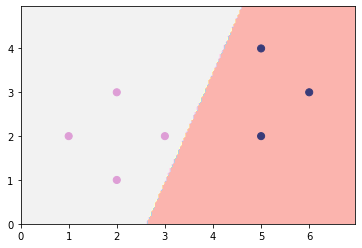

In [117]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(1)
phi = p.fit_transform(seven_X)
w = lr_train(phi, seven_y)
h = lambda xi : lr_h0(xi, w) > 0.5
plot_2d_clf_problem(seven_X, seven_y, h)
print(cross_entropy_error(phi, seven_y, w))


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [52]:
from sklearn.metrics import zero_one_loss

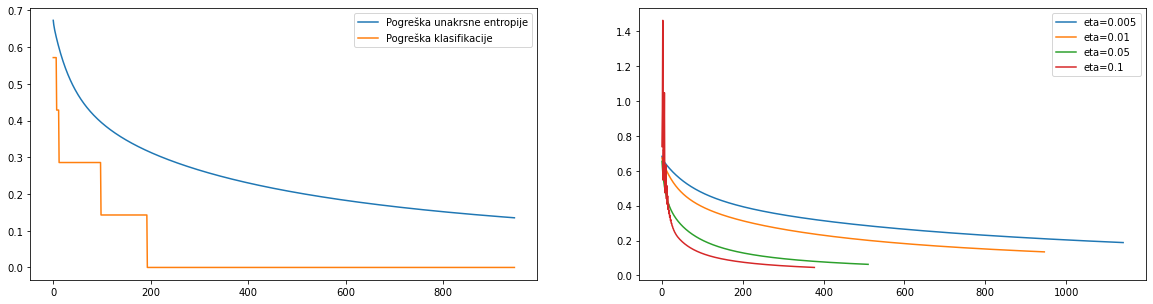

In [118]:
p = PolynomialFeatures(1)
phi = p.fit_transform(seven_X)

plt.figure(figsize= (20, 5))

_, W_trace = lr_train(phi, seven_y, trace = True)
err1 = []
err2 = []
for w in W_trace:
    err1.append(cross_entropy_error(phi, seven_y, w))
    prediction = []
    for xi in seven_X:
        prediction.append(1 if  lr_h0(xi, w) > 0.5 else 0)
    err2.append(zero_one_loss(seven_y, prediction))

plt.subplot(1, 2, 1)
plt.plot(range(len(W_trace)), err1, label="Pogreška unakrsne entropije")
plt.plot(range(len(W_trace)), err2, label="Pogreška klasifikacije")
plt.legend()

plt.subplot(1, 2, 2)
for eta in [0.005, 0.01, 0.05, 0.1]:
    error = []
    _, W_trace = lr_train(phi, seven_y, trace = True, eta = eta)
    for w in W_trace:
        error.append(cross_entropy_error(phi, seven_y, w))
    plt.plot(range(len(W_trace)), error, label="eta={}".format(eta))
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

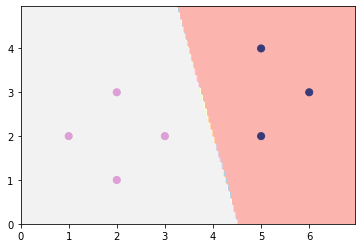

In [119]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
lr.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x : lr.predict(x))

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

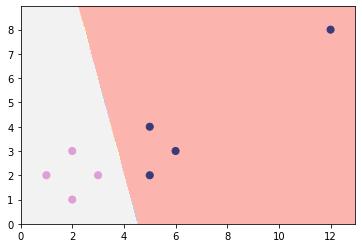

In [120]:
lr = LogisticRegression();
lr.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x : lr.predict(x))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

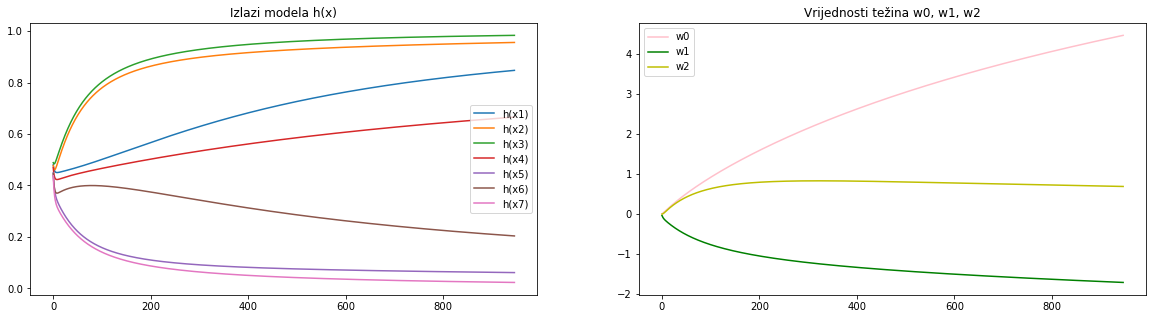

In [121]:
w, W_trace = lr_train(phi, seven_y, trace = True)
h = [] 
w0 =[]
w1 = []
w2 = []

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Izlazi modela h(x)")
for i, xi in enumerate(phi):
    h = []
    for w_current in W_trace:
        h.append(lr_h(xi, w_current))
    plt.plot(range(len(W_trace)), h, label="h(x{})".format(i+1))
plt.legend()

for w_current in W_trace:
        w0.append(w_current[0])
        w1.append(w_current[1])
        w2.append(w_current[2])
        
plt.subplot(1, 2, 2)
plt.title("Vrijednosti težina w0, w1, w2")
plt.plot(range(len(W_trace)), w0, "pink", label="w0")
plt.plot(range(len(W_trace)), w1, "g", label="w1")
plt.plot(range(len(W_trace)), w2, "y", label="w2")
plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

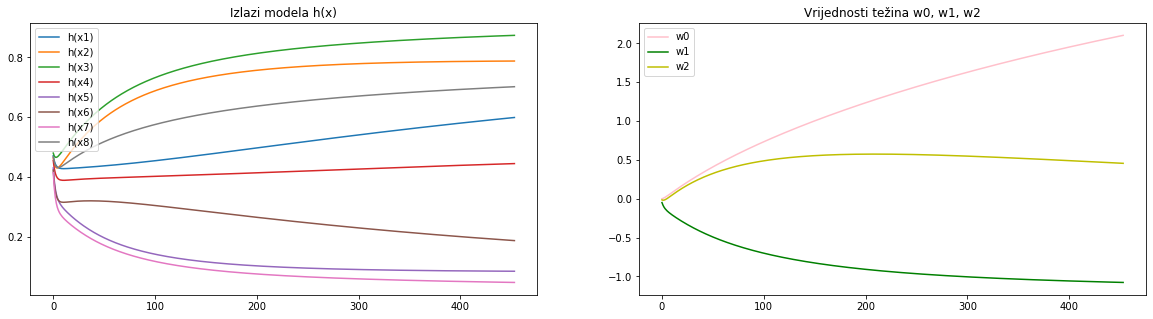

In [122]:
phi2 = p.fit_transform(unsep_X)

w, W_trace = lr_train(phi2, unsep_y, trace = True)
h = [] 
w0 =[]
w1 = []
w2 = []

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Izlazi modela h(x)")
for i, xi in enumerate(phi2):
    h = []
    for w_current in W_trace:
        h.append(lr_h(xi, w_current))
    plt.plot(range(len(W_trace)), h, label="h(x{})".format(i+1))
plt.legend()

for w_current in W_trace:
        w0.append(w_current[0])
        w1.append(w_current[1])
        w2.append(w_current[2])
        
plt.subplot(1, 2, 2)
plt.title("Vrijednosti težina w0, w1, w2")
plt.plot(range(len(W_trace)), w0, "pink", label="w0")
plt.plot(range(len(W_trace)), w1, "g", label="w1")
plt.plot(range(len(W_trace)), w2, "y", label="w2")
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [58]:
from numpy.linalg import norm

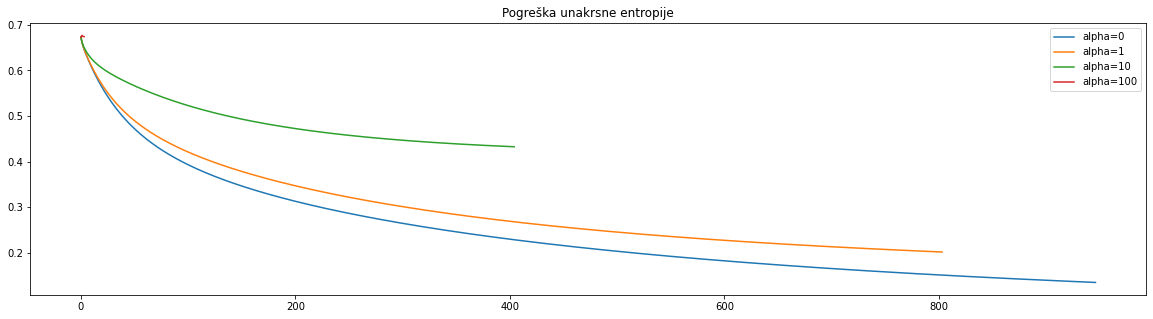

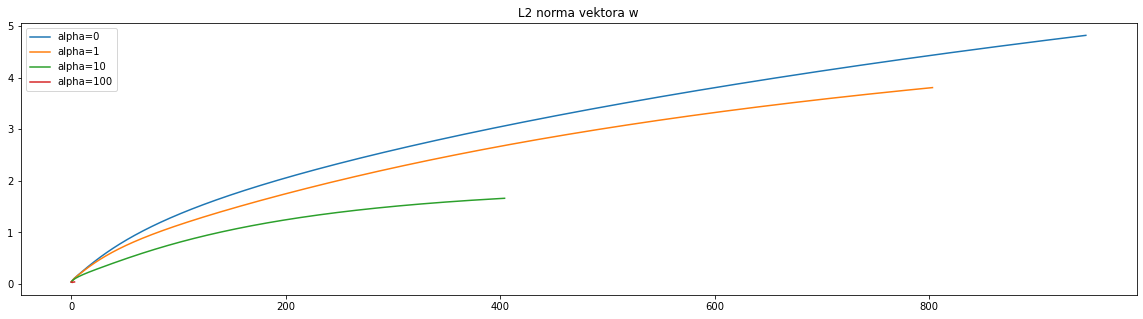

In [123]:
errors = []
l2_norms = []
for alpha in [0, 1, 10, 100]:
    w, W_train = lr_train(phi, seven_y, alpha=alpha, trace = True)
    error_current = []
    l2 = []
    for index, w in enumerate(W_train):
        error_current.append(cross_entropy_error(phi, seven_y, w))
        l2.append(norm(w))
    errors.append(error_current)
    l2_norms.append(l2)
    
plt.figure(figsize(20, 5))
plt.title("Pogreška unakrsne entropije")
plt.plot(range(len(errors[0])), errors[0], label = "alpha=0")
plt.plot(range(len(errors[1])), errors[1], label = "alpha=1")
plt.plot(range(len(errors[2])), errors[2], label = "alpha=10")
plt.plot(range(len(errors[3])), errors[3], label = "alpha=100")
plt.legend()

plt.figure(figsize(20, 5))
plt.title("L2 norma vektora w")
plt.plot(range(len(l2_norms[0])), l2_norms[0], label = "alpha=0")
plt.plot(range(len(l2_norms[1])), l2_norms[1], label = "alpha=1")
plt.plot(range(len(l2_norms[2])), l2_norms[2], label = "alpha=10")
plt.plot(range(len(l2_norms[3])), l2_norms[3], label = "alpha=100")
plt.legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [90]:
from sklearn.preprocessing import PolynomialFeatures


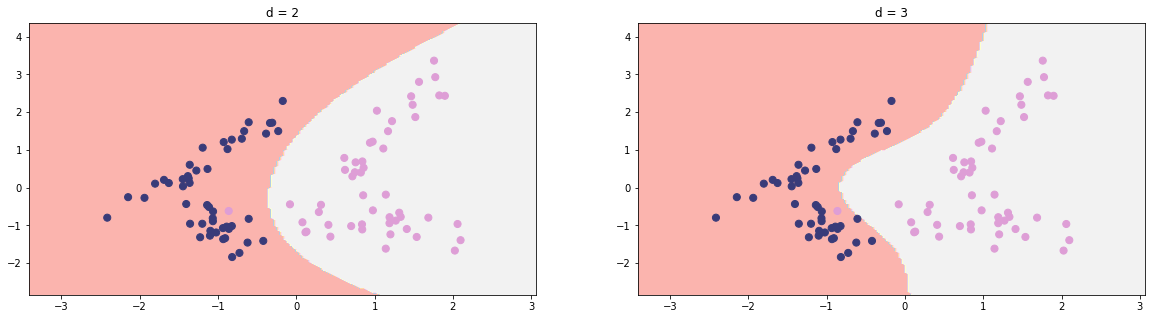

In [125]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features = 2, n_clusters_per_class = 2, n_redundant=0)
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
model1 = LogisticRegression().fit(poly2.fit_transform(X), y)
model2 = LogisticRegression().fit(poly3.fit_transform(X), y)
plt.figure(figsize(20, 5))
plt.subplot(1, 2, 1)
plt.title("d = 2")
plot_2d_clf_problem(X, y, lambda x : model1.predict(poly2.fit_transform(x)))
plt.subplot(1, 2, 2)
plt.title("d = 3")
plot_2d_clf_problem(X, y, lambda x : model2.predict(poly3.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?